# Analyse de données sur les accidents routiers corporels en 2019
`Valentine CROIBIEN - Adrien SAGRAFENA`

# Création du jeu de données
## Importation des bibliothèques nécessaires

In [1]:
import pandas as pd
import numpy as np
from datetime import date as dt
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Importation des données et choix des variables

### Données correspondant aux caractéristiques de l'accident

In [2]:
carac = pd.read_csv("data/caracteristiques-2019.csv", sep=";")
var_carac = ["Num_Acc","jour","mois","hrmn","lum","dep","com","agg","int","atm","col"]
carac = carac[var_carac]
carac.describe(include = "all")

,Num_Acc,jour,mois,hrmn,lum,dep,com,agg,int,atm,col
count,5.884000e+04,58840.000000,58840.000000,58840,58840.000000,58840,58840,58840.000000,58840.000000,58840.000000,58840.000000
unique,NaN,NaN,NaN,1386,NaN,107,11444,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,18:00,NaN,75,75116,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,784,NaN,5610,629,NaN,NaN,NaN,NaN
mean,2.019000e+11,15.683396,6.687542,NaN,1.944867,NaN,NaN,1.645887,2.025357,1.617794,4.165058
std,1.698579e+04,8.719610,3.387344,NaN,1.504409,NaN,NaN,0.478248,1.997756,1.677988,1.954030
min,2.019000e+11,1.000000,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,-1.000000,-1.000000
25%,2.019000e+11,8.000000,4.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,3.000000
50%,2.019000e+11,16.000000,7.000000,NaN,1.000000,NaN,NaN,2.000000,1.000000,1.000000,3.000000
75%,2.019000e+11,23.000000,10.000000,NaN,3.000000,NaN,NaN,2.000000,2.000000,1.000000,6.000000


### Données correspondant aux usagers impliqués dans l'accident

In [3]:
usagers = pd.read_csv("data/usagers-2019.csv", sep=";")
var_usagers = ["Num_Acc","id_vehicule","catu","place", "grav","sexe","an_nais","trajet"]
usagers = usagers[var_usagers]
usagers.describe(include = "all")

,Num_Acc,id_vehicule,catu,place,grav,sexe,an_nais,trajet
count,1.329770e+05,132977,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000
unique,NaN,98670,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,138 212 691,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.019000e+11,NaN,1.352587,2.184754,2.542635,1.320304,1980.079600,3.224279
std,1.699444e+04,NaN,0.630635,2.695724,1.371815,0.466595,19.164625,2.667380
min,2.019000e+11,NaN,1.000000,1.000000,1.000000,1.000000,1900.000000,-1.000000
25%,2.019000e+11,NaN,1.000000,1.000000,1.000000,1.000000,1967.000000,0.000000
50%,2.019000e+11,NaN,1.000000,1.000000,3.000000,1.000000,1983.000000,4.000000
75%,2.019000e+11,NaN,2.000000,2.000000,4.000000,2.000000,1995.000000,5.000000


## Jointure des deux jeux de données

In [4]:
victime = usagers.merge(carac, on="Num_Acc")

## Création de la variable `Date` à partir des variables `jour` et `mois`

In [5]:
date = []
for i in range(len(victime)):
    jour = victime["jour"][i]
    mois = victime["mois"][i]
    jour_mois = str(mois) + "/" + str(jour) + "/2019"
    date.append(jour_mois)
    
victime["date"] = date

victime["date"] = pd.to_datetime(victime['date'])

victime = victime.drop(columns = ["jour", "mois"])
victime.describe(include = "all")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  del sys.path[0]


,Num_Acc,id_vehicule,catu,place,grav,sexe,an_nais,trajet,hrmn,lum,dep,com,agg,int,atm,col,date
count,1.329770e+05,132977,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977.000000,132977,132977.000000,132977,132977,132977.000000,132977.000000,132977.000000,132977.000000,132977
unique,NaN,98670,NaN,NaN,NaN,NaN,NaN,NaN,1386,NaN,107,11444,NaN,NaN,NaN,NaN,365
top,NaN,138 212 691,NaN,NaN,NaN,NaN,NaN,NaN,18:00,NaN,75,75116,NaN,NaN,NaN,NaN,2019-06-21 00:00:00
freq,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,1870,NaN,11895,1418,NaN,NaN,NaN,NaN,571
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 00:00:00
mean,2.019000e+11,NaN,1.352587,2.184754,2.542635,1.320304,1980.079600,3.224279,NaN,1.932710,NaN,NaN,1.622596,2.016552,1.614279,3.890071,NaN
std,1.699444e+04,NaN,0.630635,2.695724,1.371815,0.466595,19.164625,2.667380,NaN,1.495194,NaN,NaN,0.484739,1.982705,1.672985,1.862988,NaN
min,2.019000e+11,NaN,1.000000,1.000000,1.000000,1.000000,1900.000000,-1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,-1.000000,-1.000000,NaN
25%,2.019000e+11,NaN,1.000000,1.000000,1.000000,1.000000,1967.000000,0.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,3.000000,NaN


## Changement du type des variables

### La variable `Num_Acc` devient une variable caractère

In [6]:
num = []
for i in range(len(victime)):
    num.append(str(victime["Num_Acc"][i]))
    
victime["Num_Acc"] = num

### Les variables `lum`, `agg`, `int`, `col`, `atm`, `catu`, `grav`, `sexe`, `trajet`, `place` deviennent des variables catégorielles.

### Changement modalités des variables

In [7]:
lum = ["Plein jour", "Crépuscule ou aube","Nuit sans éclairage public","Nuit avec éclairage public non allumé",
       "Nuit avec éclairage public allumé"]
v_lum = []

for i in range(len(victime)):
    j = victime["lum"][i] - 1
    v_lum.append(lum[j])
    
victime["lum"] = v_lum

In [8]:
agg = ["Hors agglomération", "En agglomération"]
v_agg = []

for i in range(len(victime)):
    j = victime["agg"][i] - 1
    v_agg.append(agg[j])
    
victime["agg"] = v_agg

In [9]:
inte = ["Hors intersection","Intersection en X","Intersection en T","Intersection en Y","Intersection à plus de 4 branches",  
        "Giratoire","Place","Passage à niveau","Autre intersection"]

v_int = []

for i in range(len(victime)):
    j = victime["int"][i] - 1
    v_int.append(inte[j])
    
victime["int"] = v_int

### Suppression des accidents dont le type de condition atmosphérique n'a pas été indiqué

In [10]:
victime.loc[(victime['atm'] == -1 ),:].shape[0]

1

In [11]:
victime = victime.loc[~(victime['atm'] == -1 ),:]

In [12]:
victime.groupby("atm").size()

atm
1    105340
2     14749
3      3244
4       617
5       723
6       367
7      2336
8      4944
9       656
dtype: int64

In [13]:
atm = ["Normale", "Pluie légère", "Pluie forte", "Neige - Grêle", "Brouillard - Fumée", "Vent fort - Tempête", 
       "Temps éblouissant", "Temps couvert", "Autre"]

v_atm = []

for i in victime.index.values:
    j = victime["atm"][i] - 1
    v_atm.append(atm[j])
    
victime["atm"] = v_atm

### Suppression des accidents dont le type de collision n'a pas été indiqué

In [14]:
victime.loc[(victime['col'] == -1 ),:].shape[0]

1

In [15]:
victime = victime.loc[~(victime['col'] == -1 ),:]

In [16]:
victime.groupby("col").size()

col
1    13956
2    17977
3    40350
4     9292
5     7899
6    34838
7     8663
dtype: int64

In [17]:
col = ["Deux véhicules - frontale", "Deux véhicules - par l'arrière", "Deux véhicules - par le côté", 
       "Trois véhicules et plus - en chaîne", "Trois véhicules et plus - collisions multiples", "Autre collision", 
       "Sans collision"]

v_col = []
for i in victime.index.values:
    j = victime["col"][i] - 1
    v_col.append(col[j])
    
victime["col"] = v_col

In [18]:
grav = ["Indemne", "Tué", "Blessé hospitalisé", "Blessé léger"]

v_grav = []
for i in victime.index.values:
    j = victime["grav"][i] - 1
    v_grav.append(grav[j])
    
victime["grav"] = v_grav

In [19]:
sexe = ["Masculin", "Féminin"]
v_sexe = []
for i in victime.index.values:
    j = victime["sexe"][i] - 1
    v_sexe.append(sexe[j])
    
victime["sexe"] = v_sexe

In [20]:
trajet = ["Autre", "Domicile – travail", "Domicile – école", "Courses – achats", 
          "Utilisation professionnelle", "Promenade – loisirs"]

v_traj = []
for i in victime.index.values:
    if (victime["trajet"][i] == -1) or (victime["trajet"][i] == 9):
        v_traj.append(trajet[0])
    else :
        j = victime["trajet"][i]
        v_traj.append(trajet[j])
victime["trajet"] = v_traj

In [21]:
place = ["Conducteur", "Passager Avant", "Passager", "Passager", "Passager", "Passager Avant", "Passager", 
         "Passager", "Passager", "Piéton"]
v_place = []
for i in victime.index.values:
    j = victime["place"][i] - 1
    v_place.append(place[j])

        
victime["place"] = v_place

In [22]:
victime["lum"] = victime["lum"].astype("category")
victime["agg"] = victime["agg"].astype("category")
victime["int"] = victime["int"].astype("category")
victime["col"] = victime["col"].astype("category")
victime["atm"] = victime["atm"].astype("category")
victime["catu"] = victime["catu"].astype("category")
victime["grav"] = victime["grav"].astype("category")
victime["sexe"] = victime["sexe"].astype("category")
victime["trajet"] = victime["trajet"].astype("category")
victime["place"] = victime["place"].astype("category")

## Création d'une variable correspondant au nombre de véhicules impliqués dans l'accident

In [23]:
eff_veh = victime.groupby("Num_Acc")["id_vehicule"].nunique()

eff_veh = eff_veh.reset_index()
eff_veh.columns = ["Num_Acc", "nb_veh"]

victime = pd.merge(victime,eff_veh, on = "Num_Acc")

In [24]:
eff_ind = victime.groupby("Num_Acc").size()

eff_ind = eff_ind.reset_index()
eff_ind.columns = ["Num_Acc", "nb_ind"]

victime = pd.merge(victime,eff_ind, on = "Num_Acc")

## Création d'une variable `age` à partir de l'année de naissance

In [25]:
victime["age"] = 2019 - victime["an_nais"]

### Suppression de la variable `an_nais`

In [26]:
victime = victime.drop(columns=["an_nais"])

## Résumé des données

### Les variables disponibles et leur type

In [27]:
victime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 132975 entries, 0 to 132974
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      132975 non-null  object        
 1   id_vehicule  132975 non-null  object        
 2   catu         132975 non-null  category      
 3   place        132975 non-null  category      
 4   grav         132975 non-null  category      
 5   sexe         132975 non-null  category      
 6   trajet       132975 non-null  category      
 7   hrmn         132975 non-null  object        
 8   lum          132975 non-null  category      
 9   dep          132975 non-null  object        
 10  com          132975 non-null  object        
 11  agg          132975 non-null  category      
 12  int          132975 non-null  category      
 13  atm          132975 non-null  category      
 14  col          132975 non-null  category      
 15  date         132975 non-null  date

### Sommaire des variables

In [28]:
victime.describe(include="all")

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Num_Acc,id_vehicule,catu,place,grav,sexe,trajet,hrmn,lum,dep,com,agg,int,atm,col,date,nb_veh,nb_ind,age
count,132975,132975,132975.0,132975,132975,132975,132975,132975,132975,132975,132975,132975,132975,132975,132975,132975,132975.000000,132975.000000,132975.000000
unique,58838,98668,3.0,4,4,2,6,1386,5,107,11443,2,9,9,7,365,NaN,NaN,NaN
top,201900049689,138 212 691,1.0,Conducteur,Indemne,Masculin,Promenade – loisirs,18:00,Plein jour,75,75116,En agglomération,Hors intersection,Normale,Deux véhicules - par le côté,2019-06-21 00:00:00,NaN,NaN,NaN
freq,33,33,97355.0,96934,55314,90382,52020,1870,88619,11895,1418,82789,87067,105339,40350,571,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.882737,2.916646,38.920090
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830809,2.030270,19.164135
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,2.000000,24.000000


## Valeurs manquantes et aberrantes

### Valeurs manquantes

In [29]:
victime.isna().sum()

Num_Acc        0
id_vehicule    0
catu           0
place          0
grav           0
sexe           0
trajet         0
hrmn           0
lum            0
dep            0
com            0
agg            0
int            0
atm            0
col            0
date           0
nb_veh         0
nb_ind         0
age            0
dtype: int64

Il n'y a donc aucune valeur manquante.

### Valeur aberrantes

In [30]:
victime.groupby(["age",'catu']).size()

age  catu
0    1         2
     2       194
     3        14
1    1         0
     2       296
            ... 
118  2        12
     3         3
119  1       115
     2        12
     3         6
Length: 312, dtype: int64

Nous remarquons énormément d'individus de plus de 100 (avec un âge allant jusque 119 ans). Nous les supprimons donc. 
De plus, nous supprimons également les individus indiqués comme conducteurs `catu = 1` étant agés de moins de 16 ans. 

#### Nombre de personnes de plus de 100 ans

In [31]:
victime.loc[victime["age"]>100,:].shape[0]

177

#### Nombre de conducteurs de moins de 16 ans

In [32]:
victime.loc[(victime["catu"]== 1) & (victime["age"] < 16),:].shape[0]

1071

#### Suppression des usagers de plus de 100 ans et des conducteurs de moins de 16 ans

In [33]:
victime = victime.loc[~((victime["catu"]== 1) & (victime["age"] < 16) | (victime["age"] > 100)),:]

In [34]:
victime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131727 entries, 0 to 132974
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Num_Acc      131727 non-null  object        
 1   id_vehicule  131727 non-null  object        
 2   catu         131727 non-null  category      
 3   place        131727 non-null  category      
 4   grav         131727 non-null  category      
 5   sexe         131727 non-null  category      
 6   trajet       131727 non-null  category      
 7   hrmn         131727 non-null  object        
 8   lum          131727 non-null  category      
 9   dep          131727 non-null  object        
 10  com          131727 non-null  object        
 11  agg          131727 non-null  category      
 12  int          131727 non-null  category      
 13  atm          131727 non-null  category      
 14  col          131727 non-null  category      
 15  date         131727 non-null  date

In [35]:
victime.groupby(["age",'catu']).size()

age  catu
0    1         0
     2       194
     3        14
1    1         0
     2       296
            ... 
99   2         0
     3         4
100  1         1
     2         2
     3         0
Length: 303, dtype: int64

## Calendrier avec gradient de couleurs pour la représentation du nombre d'accidents par jour

In [36]:
calend = victime.groupby("date")["Num_Acc"].agg('nunique')

calend = calend.reset_index()
calend.columns = ["date", "nb_acc"]

calend.head(20)

,date,nb_acc
0,2019-01-01,105
1,2019-01-02,106
2,2019-01-03,109
3,2019-01-04,133
4,2019-01-05,103
5,2019-01-06,81
6,2019-01-07,136
7,2019-01-08,152
8,2019-01-09,154
9,2019-01-10,142


In [37]:
nom_jour = []
num_jour = []
nom_mois = []
num_mois = []
num_sem = []
for i in range(len(calend)):
    nom_jour.append(calend["date"][i].strftime("%A")) # Nom du jour
    num_jour.append(calend["date"][i].weekday()) # Numéro du jour
    nom_mois.append(calend["date"][i].strftime("%B")) # Nom du mois
    num_mois.append(calend["date"][i].month) # Numéro du mois
    num_sem.append(calend["date"][i].strftime("%V")) # Numéro de la semaine
    
calend["nom_jour"] = nom_jour
calend["num_jour"] = num_jour
calend["nom_mois"] = nom_mois
calend["num_mois"] = num_mois
calend["num_sem"] = num_sem

calend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      365 non-null    datetime64[ns]
 1   nb_acc    365 non-null    int64         
 2   nom_jour  365 non-null    object        
 3   num_jour  365 non-null    int64         
 4   nom_mois  365 non-null    object        
 5   num_mois  365 non-null    int64         
 6   num_sem   365 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 20.1+ KB


### Tracé du calendrier

Cette étape n'a pas été réalisée en python mais uniquement en R.

# Quelques statistiques univariées

## Nombre d'accidents par jour de la semaine

In [38]:
tot_jour = calend.groupby("nom_jour")["nb_acc"].sum()

tot_jour = tot_jour.reset_index()
tot_jour.columns = ["nom_jour", "nb_acc"]

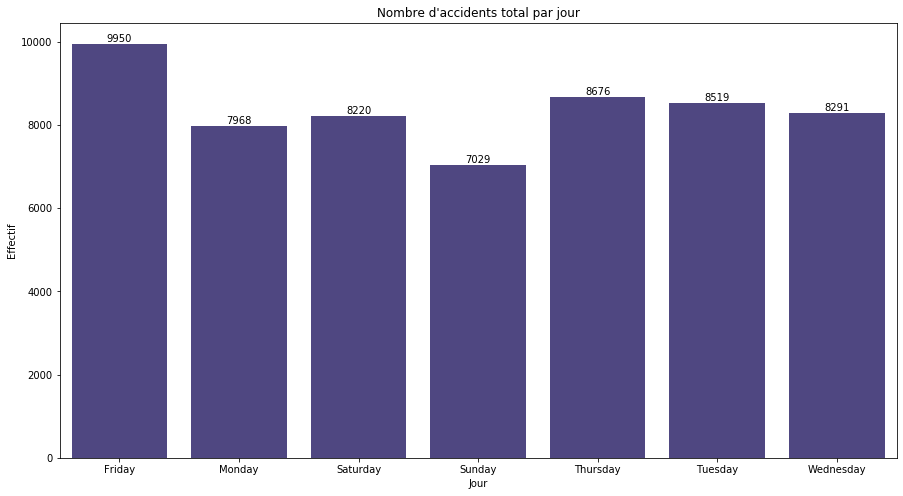

In [39]:
fig = plt.figure(1, figsize=(15,8))

ax = sns.barplot(x='nom_jour', y='nb_acc', data=tot_jour, ci=None, color= "darkslateblue")
ax.set_title("Nombre d'accidents total par jour")
ax.set_xlabel('Jour')
ax.set_ylabel('Effectif')

rects = ax.patches

# Make some labels.
labels = tot_jour["nb_acc"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

In [40]:
tot_jour = tot_jour.sort_values(by="nb_acc")

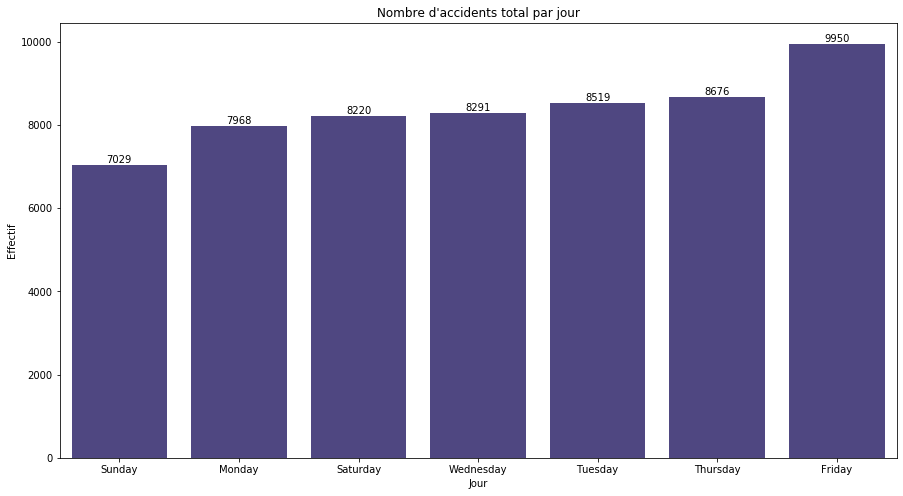

In [41]:
fig = plt.figure(2, figsize=(15,8))

ax = sns.barplot(x='nom_jour', y='nb_acc', data=tot_jour, ci=None, color="darkslateblue")
ax.set_title("Nombre d'accidents total par jour")
ax.set_xlabel('Jour')
ax.set_ylabel('Effectif')

rects = ax.patches

# Make some labels.
labels = tot_jour["nb_acc"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')

plt.show()

## Nombre d'accidents par mois

In [42]:
tot_mois = calend.groupby("nom_mois")["nb_acc"].sum()

tot_mois = tot_mois.reset_index()
tot_mois.columns = ["nom_mois", "nb_acc"]

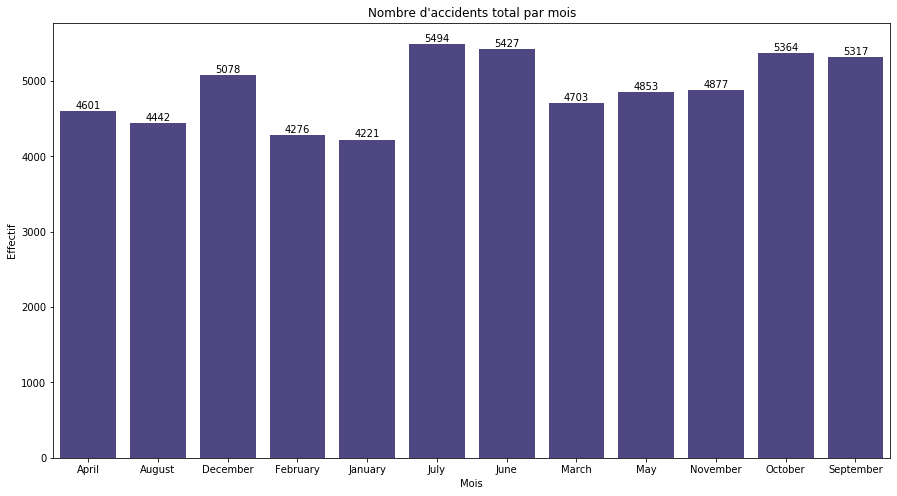

In [43]:
fig = plt.figure(3, figsize=(15, 8))


ax = sns.barplot(x='nom_mois', y='nb_acc', data=tot_mois, ci=None, color = "darkslateblue")

ax.set_title("Nombre d'accidents total par mois")
ax.set_xlabel('Mois')
ax.set_ylabel('Effectif')

rects = ax.patches

# Make some labels.
labels = tot_mois["nb_acc"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


plt.show()

In [44]:
tot_mois = tot_mois.sort_values(by="nb_acc")

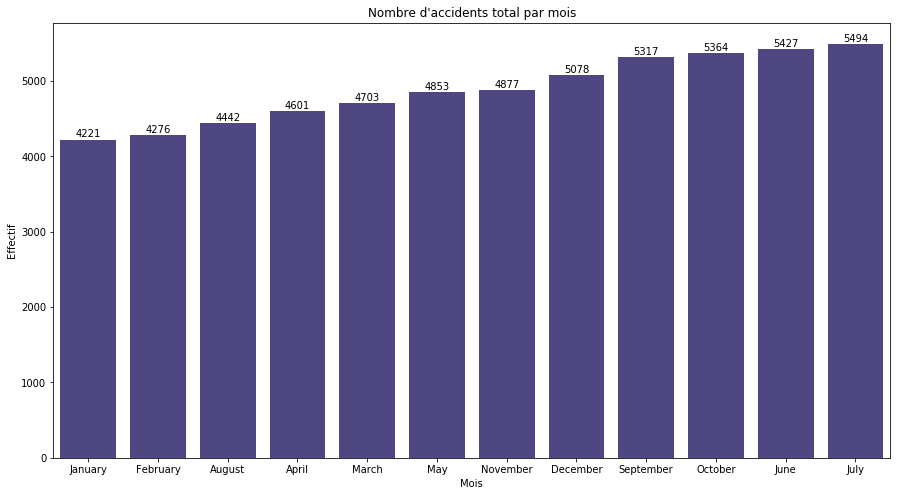

In [45]:
fig = plt.figure(4, figsize=(15, 8))


ax = sns.barplot(x='nom_mois', y='nb_acc', data=tot_mois, ci=None, color = "darkslateblue")

ax.set_title("Nombre d'accidents total par mois")
ax.set_xlabel('Mois')
ax.set_ylabel('Effectif')

rects = ax.patches

# Make some labels.
labels = tot_mois["nb_acc"]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')


plt.show()

# Quelques statistiques bivariées - Croisement de la gravité avec d'autres variables
## Gravité X Place de l'usager

In [46]:
tab_grav = victime.groupby("grav").size()
tab_grav

grav
Blessé hospitalisé    20512
Blessé léger          52628
Indemne               55107
Tué                    3480
dtype: int64

In [47]:
tab_place = victime.groupby("place").size()
tab_place

place
Conducteur        95735
Passager           9099
Passager Avant    15638
Piéton            11255
dtype: int64

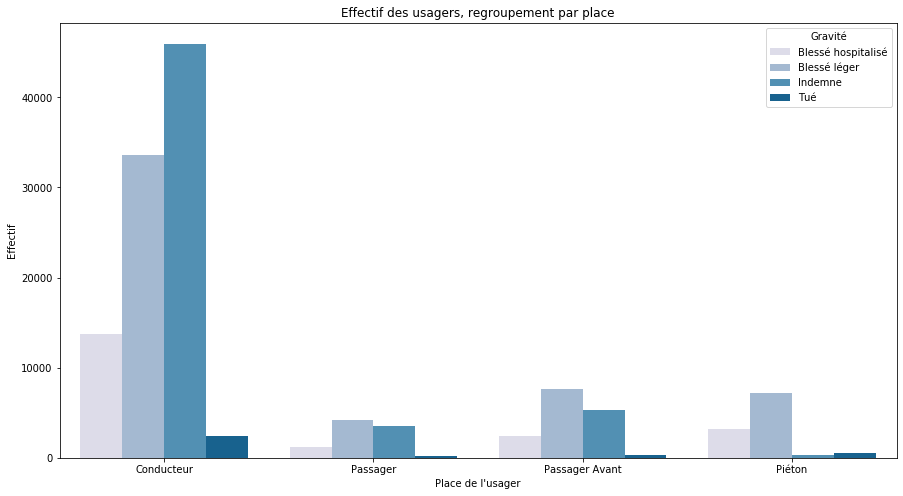

In [48]:
fig = plt.figure(5, figsize=(15, 8))

ct = pd.crosstab(victime['place'],victime['grav']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.place, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par place")
ax.set_xlabel("Place de l'usager")
ax.set_ylabel('Effectif')

plt.legend(title = "Gravité")
plt.show()

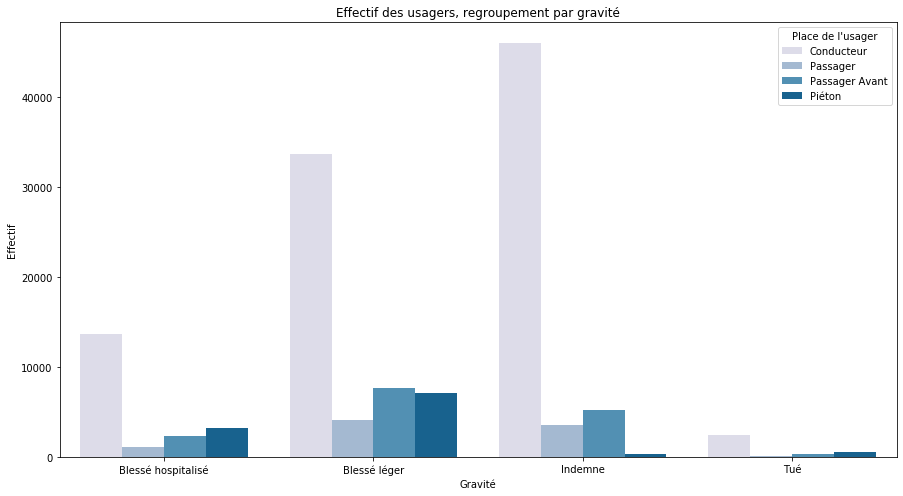

In [49]:
fig = plt.figure(6, figsize=(15, 8))

# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.place, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Effectif')

plt.legend(title = "Place de l'usager")
plt.show()

### Profils lignes

In [50]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_grav_place = ct.copy()

for i in place :
    tot = profil_ligne_grav_place.loc[i]['Total']
    profil_ligne_grav_place.loc[i] = profil_ligne_grav_place.loc[i].div(tot)*100

    
profil_ligne_grav_place = profil_ligne_grav_place.round(0)
profil_ligne_grav_place


grav,Blessé hospitalisé,Blessé léger,Indemne,Tué,Total
place,,,,,
Conducteur,14.0,35.0,48.0,3.0,100
Passager,13.0,46.0,39.0,2.0,100
Passager Avant,15.0,49.0,34.0,2.0,100
Piéton,29.0,64.0,3.0,5.0,100


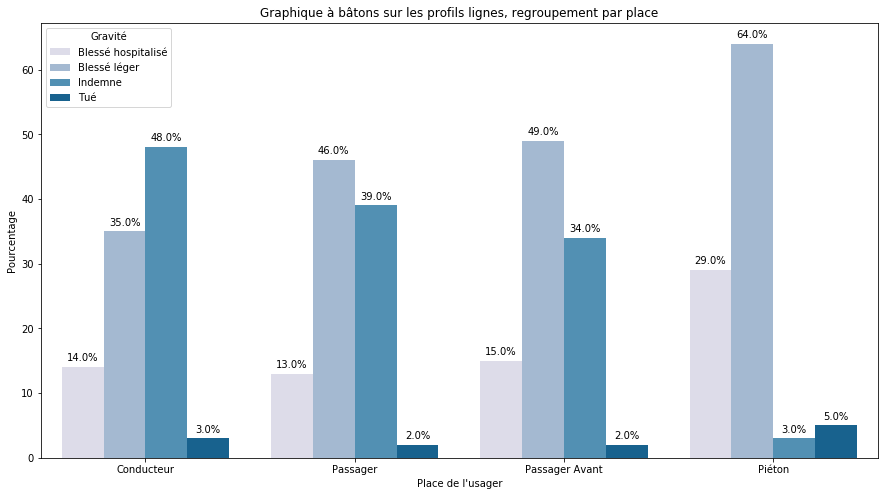

In [51]:
# now stack and reset
stacked = profil_ligne_grav_place.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.place, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par place")
ax.set_xlabel("Place de l'usager")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Gravité")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

### Profils colonnes

In [52]:
ct = ct.drop(columns = 'Total').T
ct['Total'] = ct.sum(axis=1)

profil_colonne_grav_place = ct.copy()

for i in grav :
    tot = profil_colonne_grav_place.loc[i]['Total']
    profil_colonne_grav_place.loc[i] = profil_colonne_grav_place.loc[i].div(tot)*100



profil_colonne_grav_place = profil_colonne_grav_place.round(0)
profil_colonne_grav_place

place,Conducteur,Passager,Passager Avant,Piéton,Total
grav,,,,,
Blessé hospitalisé,67.0,6.0,12.0,16.0,100
Blessé léger,64.0,8.0,15.0,14.0,100
Indemne,83.0,7.0,10.0,1.0,100
Tué,70.0,5.0,10.0,15.0,100


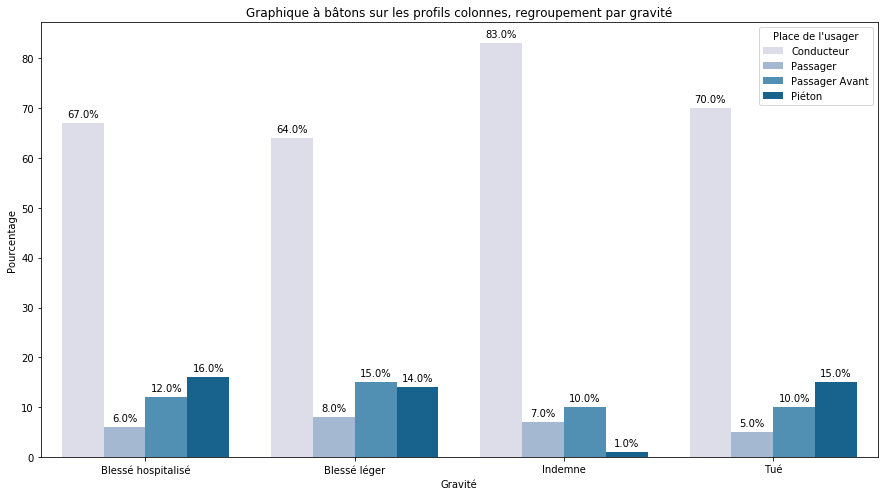

In [53]:
# now stack and reset
stacked = profil_colonne_grav_place.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.place, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils colonnes, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Place de l'usager")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

## Gravité X Trajet

In [54]:
tab_trajet = victime.groupby("trajet").size()
tab_trajet

trajet
Autre                          44018
Courses – achats                3542
Domicile – travail             17640
Domicile – école                2665
Promenade – loisirs            51365
Utilisation professionnelle    12497
dtype: int64

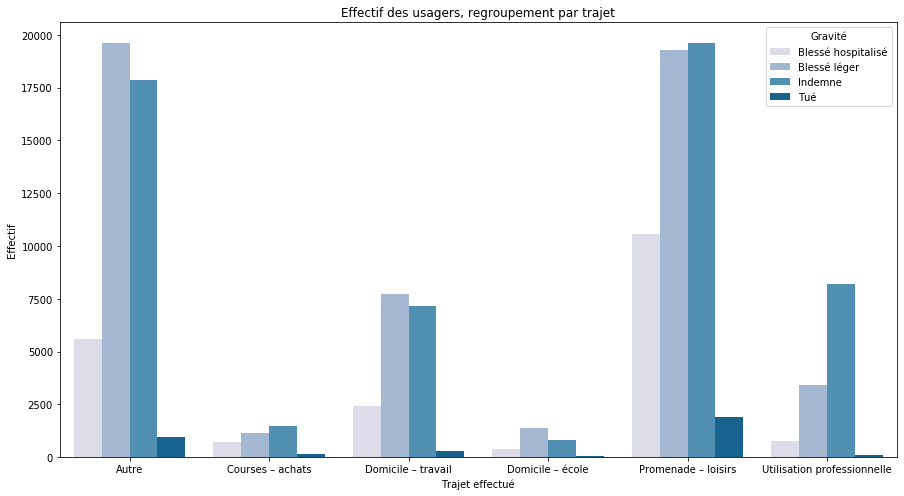

In [55]:
fig = plt.figure(7, figsize=(15, 8))

ct = pd.crosstab(victime['trajet'],victime['grav']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.trajet, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par trajet")
ax.set_xlabel("Trajet effectué")
ax.set_ylabel('Effectif')

plt.legend(title = "Gravité")

plt.show()

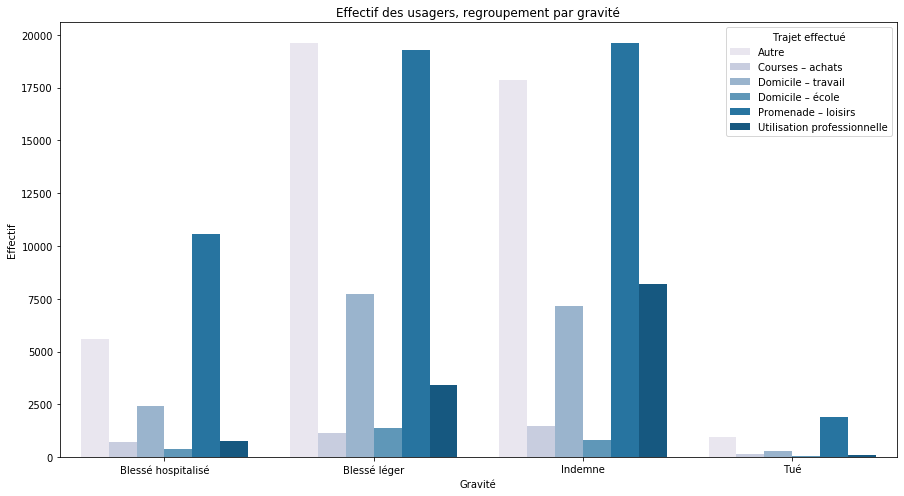

In [56]:
fig = plt.figure(8, figsize=(15, 8))

# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.trajet, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Effectif')

plt.legend(title = "Trajet effectué")
plt.show()

### Profils Lignes

In [57]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_grav_trajet = ct.copy()

for i in trajet :
    tot = profil_ligne_grav_trajet.loc[i]['Total']
    profil_ligne_grav_trajet.loc[i] = profil_ligne_grav_trajet.loc[i].div(tot)*100


profil_ligne_grav_trajet = profil_ligne_grav_trajet.round(0)
profil_ligne_grav_trajet

grav,Blessé hospitalisé,Blessé léger,Indemne,Tué,Total
trajet,,,,,
Autre,13.0,45.0,41.0,2.0,100
Courses – achats,20.0,33.0,42.0,5.0,100
Domicile – travail,14.0,44.0,41.0,2.0,100
Domicile – école,15.0,52.0,31.0,1.0,100
Promenade – loisirs,21.0,38.0,38.0,4.0,100
Utilisation professionnelle,6.0,27.0,65.0,1.0,100


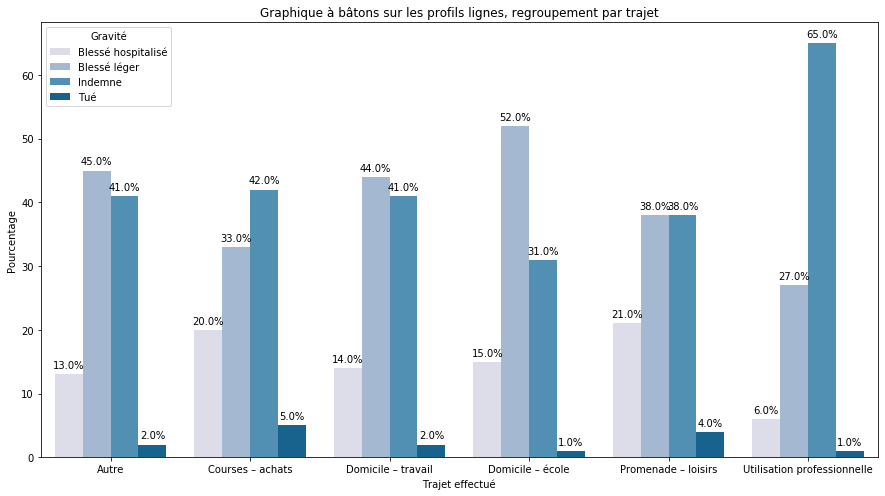

In [58]:
# now stack and reset
stacked = profil_ligne_grav_trajet.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.trajet, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par trajet")
ax.set_xlabel("Trajet effectué")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Gravité")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

### Profils colonnes

In [59]:
ct = ct.drop(columns = 'Total').T
ct['Total'] = ct.sum(axis=1)

profil_colonne_grav_trajet = ct.copy()

for i in grav :
    tot = profil_colonne_grav_trajet.loc[i]['Total']
    profil_colonne_grav_trajet.loc[i] = profil_colonne_grav_trajet.loc[i].div(tot)*100



profil_colonne_grav_trajet = profil_colonne_grav_trajet.round(0)
profil_colonne_grav_trajet

trajet,Autre,Courses – achats,Domicile – travail,Domicile – école,Promenade – loisirs,Utilisation professionnelle,Total
grav,,,,,,,
Blessé hospitalisé,27.0,4.0,12.0,2.0,52.0,4.0,100
Blessé léger,37.0,2.0,15.0,3.0,37.0,7.0,100
Indemne,32.0,3.0,13.0,1.0,36.0,15.0,100
Tué,28.0,5.0,9.0,1.0,55.0,3.0,100


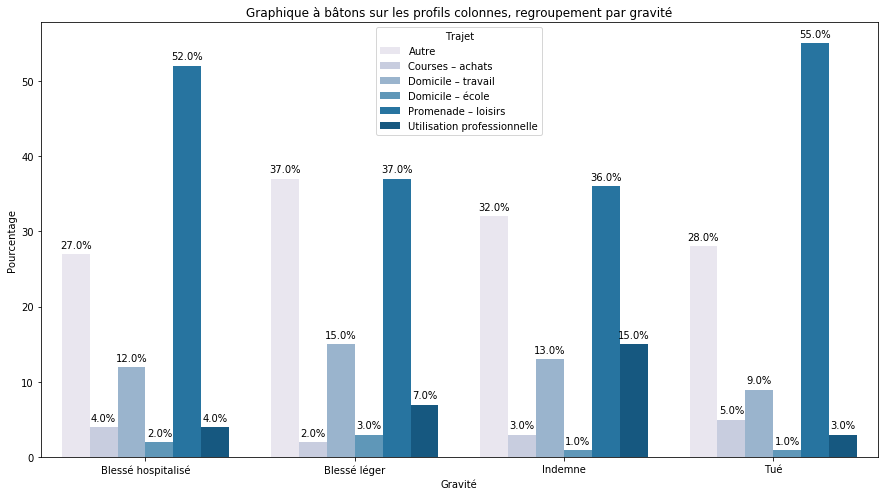

In [60]:
# now stack and reset
stacked = profil_colonne_grav_trajet.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.trajet, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils colonnes, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Trajet")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

## Gravité X Conditions atmosphériques

In [61]:
tab_atm = victime.groupby("atm").size()
tab_atm

atm
Autre                     652
Brouillard - Fumée        719
Neige - Grêle             616
Normale                104276
Pluie forte              3224
Pluie légère            14656
Temps couvert            4907
Temps éblouissant        2313
Vent fort - Tempête       364
dtype: int64

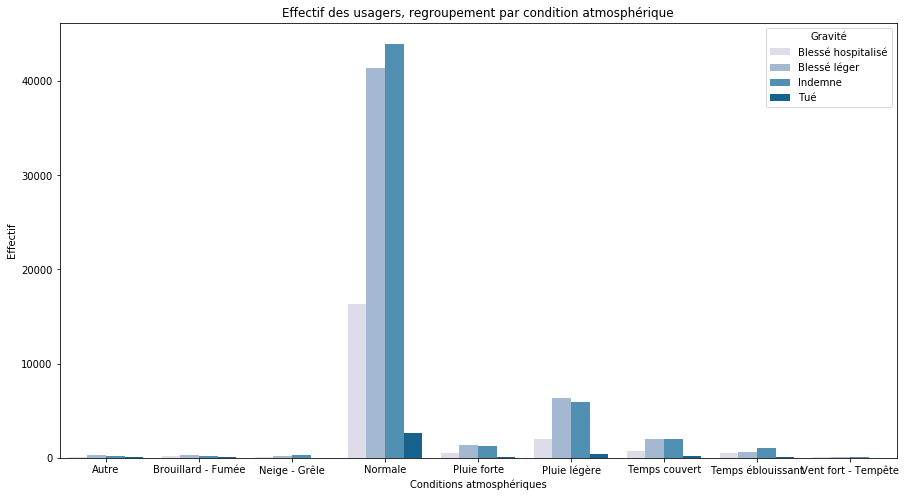

In [62]:
fig = plt.figure(9, figsize=(15, 8))

ct = pd.crosstab(victime['atm'],victime['grav']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.atm, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par condition atmosphérique")
ax.set_xlabel("Conditions atmosphériques")
ax.set_ylabel('Effectif')

plt.legend(title = "Gravité")

plt.show()

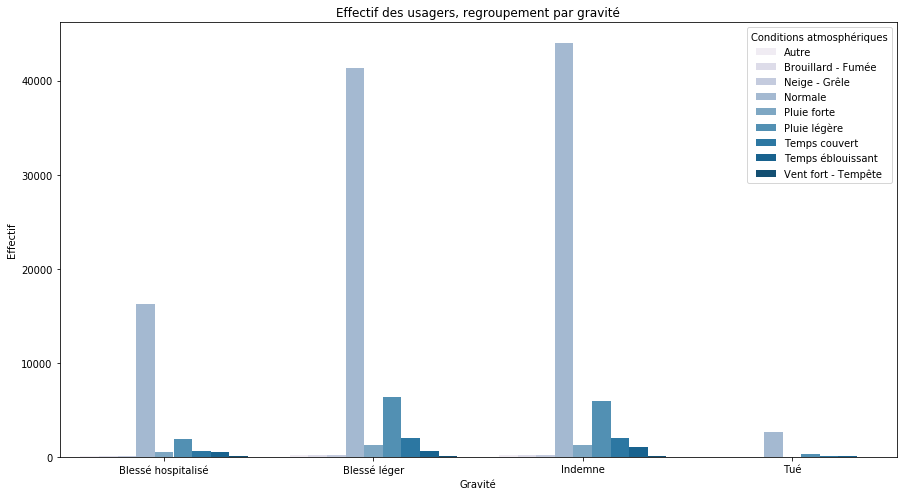

In [63]:
fig = plt.figure(10, figsize=(15, 8))

# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.atm, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Effectif')

plt.legend(title = "Conditions atmosphériques")
plt.show()

### Profils lignes

In [64]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_grav_atm = ct.copy()

for i in atm:
    tot = profil_ligne_grav_atm.loc[i]['Total']
    profil_ligne_grav_atm.loc[i] = profil_ligne_grav_atm.loc[i].div(tot)*100


profil_ligne_grav_atm = profil_ligne_grav_atm.round(0)
profil_ligne_grav_atm

grav,Blessé hospitalisé,Blessé léger,Indemne,Tué,Total
atm,,,,,
Autre,19.0,40.0,34.0,6.0,100
Brouillard - Fumée,24.0,38.0,33.0,5.0,100
Neige - Grêle,15.0,36.0,46.0,4.0,100
Normale,16.0,40.0,42.0,3.0,100
Pluie forte,17.0,41.0,40.0,3.0,100
Pluie légère,13.0,44.0,41.0,2.0,100
Temps couvert,14.0,42.0,41.0,3.0,100
Temps éblouissant,23.0,29.0,45.0,4.0,100
Vent fort - Tempête,26.0,34.0,33.0,7.0,100


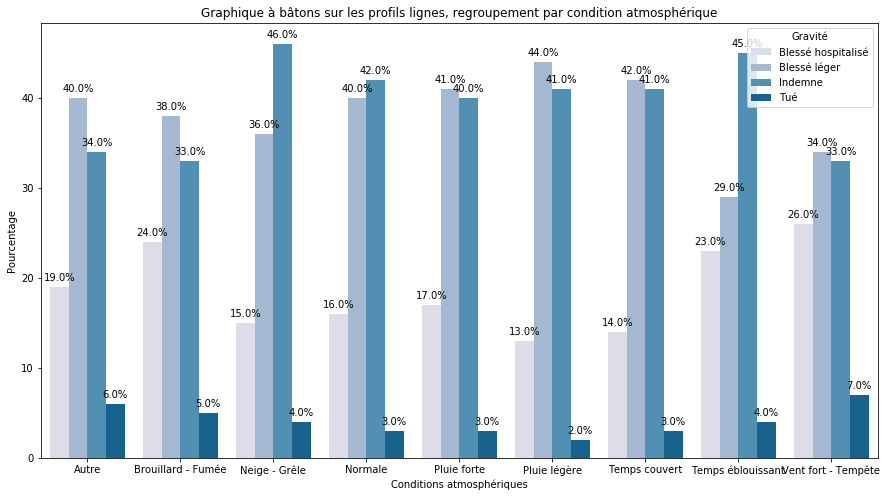

In [65]:
# now stack and reset
stacked = profil_ligne_grav_atm.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.atm, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par condition atmosphérique")
ax.set_xlabel("Conditions atmosphériques")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Gravité")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

### Profils colonnes

In [66]:
ct = ct.drop(columns = 'Total').T
ct['Total'] = ct.sum(axis=1)

profil_colonne_grav_atm = ct.copy()

for i in grav :
    tot = profil_colonne_grav_atm.loc[i]['Total']
    profil_colonne_grav_atm.loc[i] = profil_colonne_grav_atm.loc[i].div(tot)*100



profil_colonne_grav_atm = profil_colonne_grav_atm.round(0)
profil_colonne_grav_atm

atm,Autre,Brouillard - Fumée,Neige - Grêle,Normale,Pluie forte,Pluie légère,Temps couvert,Temps éblouissant,Vent fort - Tempête,Total
grav,,,,,,,,,,
Blessé hospitalisé,1.0,1.0,0.0,79.0,3.0,10.0,3.0,3.0,0.0,100
Blessé léger,1.0,1.0,0.0,79.0,2.0,12.0,4.0,1.0,0.0,100
Indemne,0.0,0.0,1.0,80.0,2.0,11.0,4.0,2.0,0.0,100
Tué,1.0,1.0,1.0,77.0,2.0,10.0,5.0,2.0,1.0,100


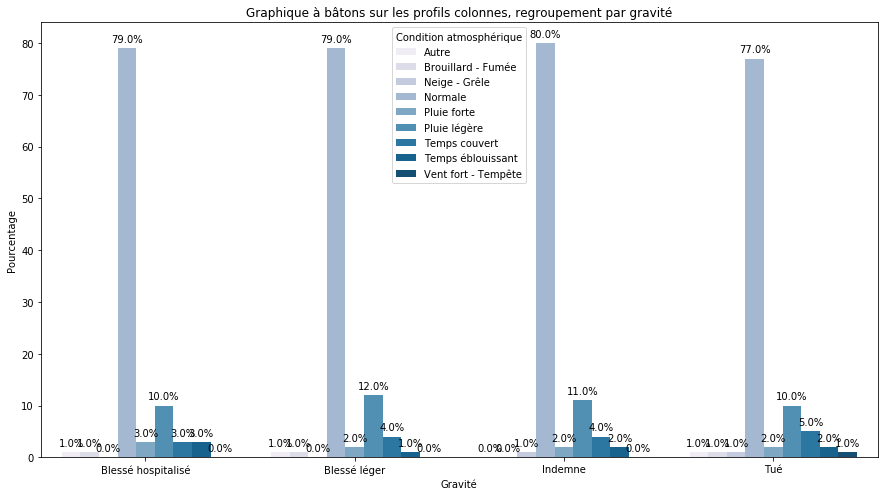

In [67]:
# now stack and reset
stacked = profil_colonne_grav_atm.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.atm, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils colonnes, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Condition atmosphérique")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

## Gravité X Luminosité

In [68]:
tab_lum = victime.groupby("lum").size()
tab_lum

lum
Crépuscule ou aube                        8211
Nuit avec éclairage public allumé        21053
Nuit avec éclairage public non allumé     1199
Nuit sans éclairage public               13629
Plein jour                               87635
dtype: int64

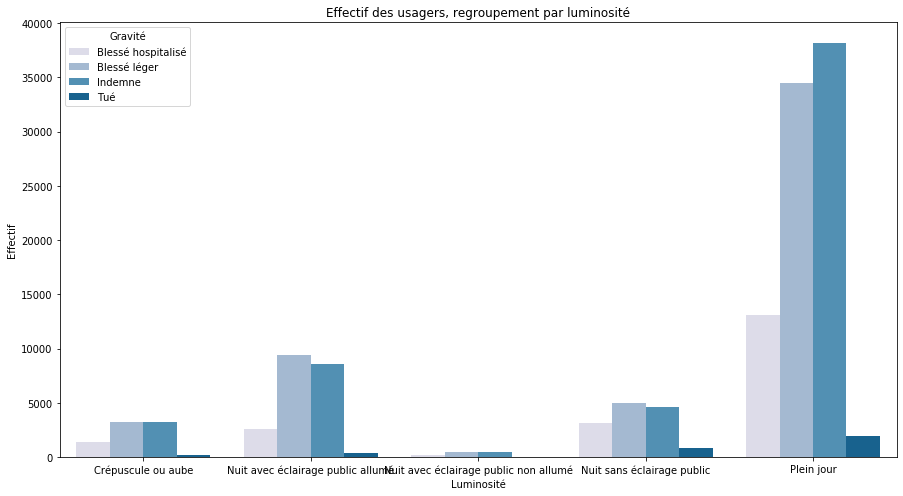

In [69]:
fig = plt.figure(11, figsize=(15, 8))

ct = pd.crosstab(victime['lum'],victime['grav']) 

# now stack and reset
stacked = ct.stack().reset_index().rename(columns={0:'value'})

# plot grouped bar chart
ax = sns.barplot(x=stacked.lum, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par luminosité")
ax.set_xlabel("Luminosité")
ax.set_ylabel('Effectif')

plt.legend(title = "Gravité")

plt.show()

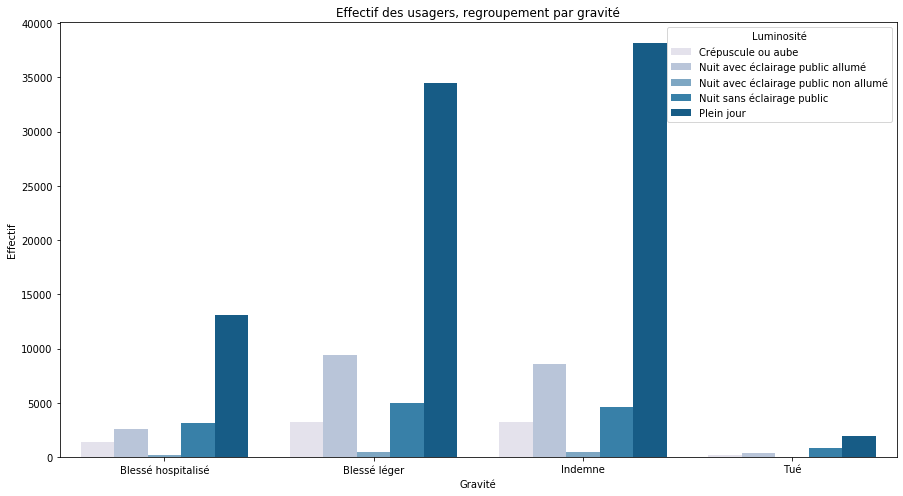

In [70]:
fig = plt.figure(12, figsize=(15, 8))

# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.lum, palette="PuBu")
ax.set_title("Effectif des usagers, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Effectif')

plt.legend(title = "Luminosité")
plt.show()

### Profils lignes

In [71]:
ct['Total'] = ct.sum(axis=1)

profil_ligne_grav_lum = ct.copy()

for i in lum:
    tot = profil_ligne_grav_lum.loc[i]['Total']
    profil_ligne_grav_lum.loc[i] = profil_ligne_grav_lum.loc[i].div(tot)*100


profil_ligne_grav_lum = profil_ligne_grav_lum.round(0)
profil_ligne_grav_lum

grav,Blessé hospitalisé,Blessé léger,Indemne,Tué,Total
lum,,,,,
Crépuscule ou aube,18.0,39.0,40.0,3.0,100
Nuit avec éclairage public allumé,13.0,45.0,41.0,2.0,100
Nuit avec éclairage public non allumé,14.0,43.0,39.0,4.0,100
Nuit sans éclairage public,23.0,37.0,34.0,6.0,100
Plein jour,15.0,39.0,44.0,2.0,100


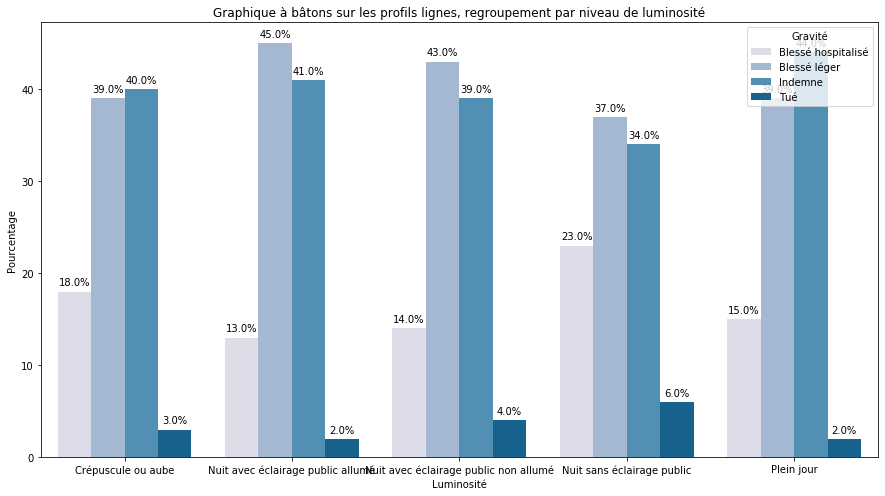

In [72]:
# now stack and reset
stacked = profil_ligne_grav_lum.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.lum, y=stacked.value, hue=stacked.grav, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils lignes, regroupement par niveau de luminosité")
ax.set_xlabel("Luminosité")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Gravité")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

### Profils colonnes

In [73]:
ct = ct.drop(columns = 'Total').T
ct['Total'] = ct.sum(axis=1)

profil_colonne_grav_lum = ct.copy()

for i in grav :
    tot = profil_colonne_grav_lum.loc[i]['Total']
    profil_colonne_grav_lum.loc[i] = profil_colonne_grav_lum.loc[i].div(tot)*100



profil_colonne_grav_lum = profil_colonne_grav_lum.round(0)
profil_colonne_grav_lum

lum,Crépuscule ou aube,Nuit avec éclairage public allumé,Nuit avec éclairage public non allumé,Nuit sans éclairage public,Plein jour,Total
grav,,,,,,
Blessé hospitalisé,7.0,13.0,1.0,15.0,64.0,100
Blessé léger,6.0,18.0,1.0,10.0,65.0,100
Indemne,6.0,16.0,1.0,8.0,69.0,100
Tué,7.0,11.0,1.0,25.0,56.0,100


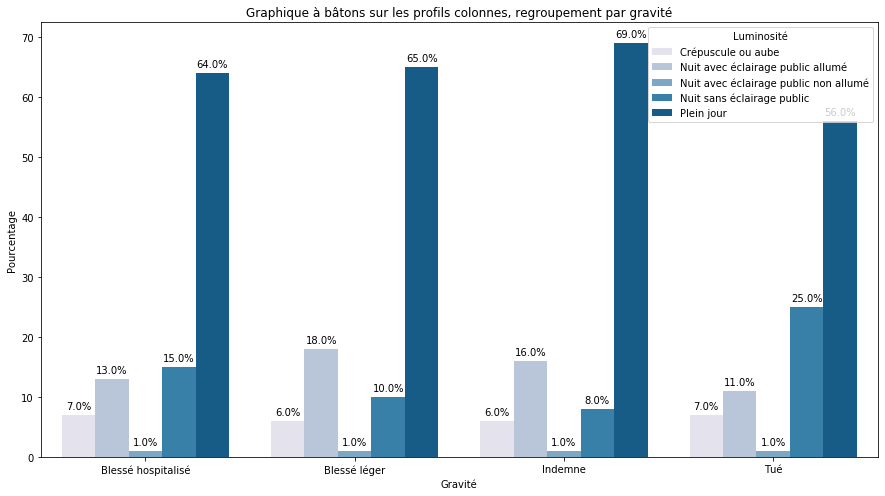

In [74]:
# now stack and reset
stacked = profil_colonne_grav_lum.drop(columns='Total').stack().reset_index().rename(columns={0:'value'})

fig = plt.figure(7, figsize=(15, 8))


# plot grouped bar chart
ax = sns.barplot(x=stacked.grav, y=stacked.value, hue=stacked.lum, palette="PuBu")
ax.set_title("Graphique à bâtons sur les profils colonnes, regroupement par gravité")
ax.set_xlabel("Gravité")
ax.set_ylabel('Pourcentage')

plt.legend(title = "Luminosité")

for p in ax.patches: 
    ax.annotate(format(p.get_height()) + "%", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='center', 
                   xytext=(0, 9), 
                   textcoords='offset points')
    
plt.show()

# ACM